<a href="https://colab.research.google.com/github/zakarya-elmimouni/cat-or-dogs/blob/main/cats_an_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2,os
data_path='/content/drive/MyDrive/train_1/'
label_dict={'dog': 1,'cat': 0}
categories=["cat","dog"]
print(label_dict)
print(categories)


{'dog': 1, 'cat': 0}
['cat', 'dog']


In [ ]:
#preparing Data
img_size=256
data=[]
y=[]
#parcourir les images et créer des labels pour chaque image suivant le dictionnaire
folder_train_path="/content/drive/MyDrive/train_1"
img_names=os.listdir(folder_train_path)

for img_name in img_names:
    img_path=os.path.join(folder_train_path,img_name)
    img=cv2.imread(img_path)
    try:
        #gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        resized=cv2.resize(img,(img_size,img_size))
        #resizing the image  into 256 x 256, since we need a fixed common size for all the images in the dataset
        data.append(resized)
        if "cat" in img_name:
          y.append(0)
        else:
          y.append(1) # dogs are libelised using 1
          #appending the image and the label(categorized) into the list (dataset)
    except Exception as e:
        print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

In [ ]:
import numpy as np
data=np.array(data)/255.0
print(data.shape)
data=np.reshape(data,(data.shape[0],img_size,img_size,3))
y=np.array(y)
from keras.utils import np_utils
new_label=np_utils.to_categorical(y)    #one hot encoding
new_label.shape

(1040, 256, 256, 3)


(1040, 2)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(256,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(4,4)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(4,4)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(4,4)))
#The thrid convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
#Flatten layer to stack the output convolutions from 3rd convolution layer
model.add(Dropout(0.2))

model.add(Dense(128,activation='relu'))
#Dense layer of 128 neurons

model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
#Dense layer of 64 neurons

model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,new_label,test_size=0.1)

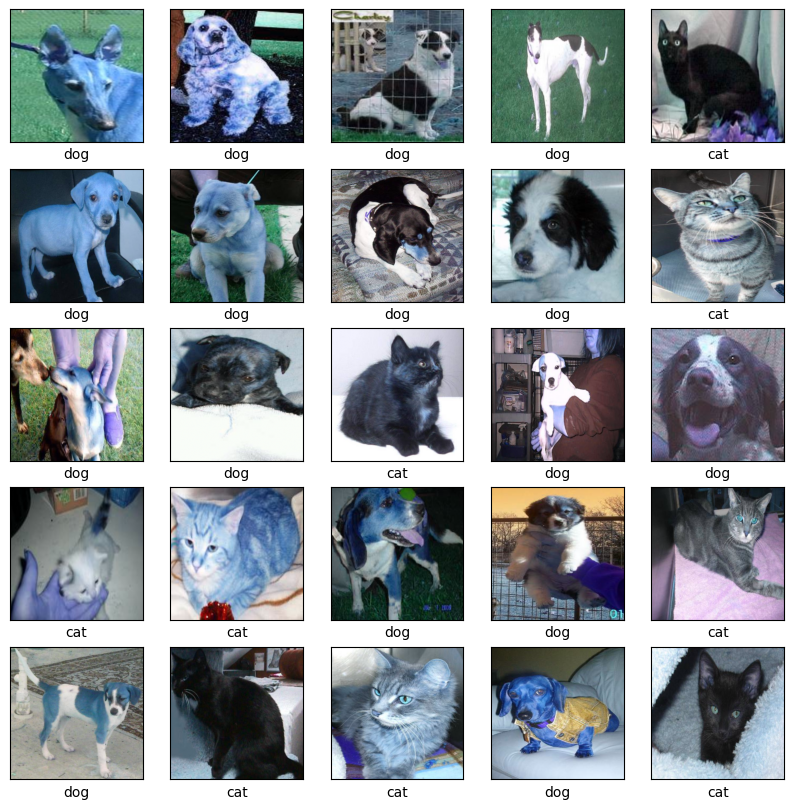

In [ ]:
#display DATA
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.squeeze(x_test[i]))
    plt.xlabel(categories[np.argmax(y_test[i])])
plt.show()

In [ ]:
history=model.fit(x_train,y_train,epochs=40,validation_split=0.2)

Epoch 1/40
24/24 [==============================] - 21s 278ms/step - loss: 0.7028 - accuracy: 0.4973 - val_loss: 0.6926 - val_accuracy: 0.5372
Epoch 2/40
24/24 [==============================] - 4s 163ms/step - loss: 0.6918 - accuracy: 0.5241 - val_loss: 0.6897 - val_accuracy: 0.5160
Epoch 3/40
24/24 [==============================] - 4s 158ms/step - loss: 0.6892 - accuracy: 0.5414 - val_loss: 0.7009 - val_accuracy: 0.4894
Epoch 4/40
24/24 [==============================] - 4s 158ms/step - loss: 0.6866 - accuracy: 0.5495 - val_loss: 0.7163 - val_accuracy: 0.4787
Epoch 5/40
24/24 [==============================] - 4s 175ms/step - loss: 0.6895 - accuracy: 0.5508 - val_loss: 0.6917 - val_accuracy: 0.5160
Epoch 6/40
24/24 [==============================] - 4s 163ms/step - loss: 0.6756 - accuracy: 0.5842 - val_loss: 0.6645 - val_accuracy: 0.6277
Epoch 7/40
24/24 [==============================] - 4s 160ms/step - loss: 0.6468 - accuracy: 0.6337 - val_loss: 0.6639 - val_accuracy: 0.6330
Epoch

In [ ]:
model.save('cat_dog.h5')

In [ ]:
#évaluer le modèle
vaL_loss, val_accuracy= model.evaluate(x_test, y_test, verbose=0)
print("test loss:", vaL_loss,'%')
print("test accuracy:", val_accuracy*100,"%")

test loss: 1.8635849952697754 %
test accuracy: 61.538463830947876 %


1/1 [==============================] - 0s 342ms/step
A.I predicts: cat
Correct prediction for label 0 is cat


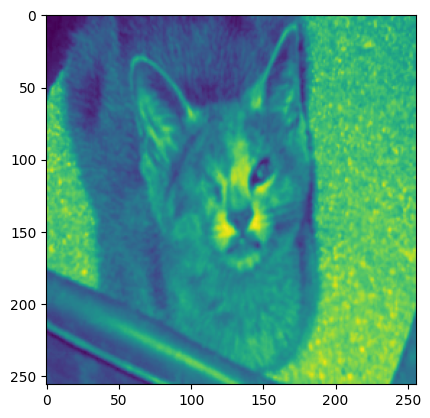

In [ ]:
#prediction for single value
X =8
img_size = 256
img_single = x_test[X]
img_single = cv2.resize(img_single, (img_size, img_size))
img_single = (np.expand_dims(img_single, 0))
img_single = img_single.reshape(img_single.shape[0],256,256,1)

predictions_single = model.predict(img_single)
print('A.I predicts:',categories[np.argmax(predictions_single)])
print("Correct prediction for label",np.argmax(y_test[X]),'is',categories[np.argmax(y_test[X])])
plt.imshow(np.squeeze(img_single))
plt.grid(False)
plt.show()